In [1]:
import time
import random
import math
from math import *
import operator
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import style
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# load make_blobs to simulate data
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression

# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from statsmodels.tools.eval_measures import rmse
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

# pre-processing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer
###from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut 

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

C:\Users\Amrita\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.preprocessing.data module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.preprocessing. Anything that cannot be imported from sklearn.preprocessing is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
location = r"E:\Python\Machine Learning\datasets\titanic-train.csv"

In [3]:
# load the training data from breast cancer data set
df_training = pd.read_csv(location)

In [4]:
# examine the structure of data
df_training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_training.shape

(891, 12)

In [6]:
# Examine any missing
df_training.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Cleaning
# We will remove ‘Cabin’, ‘Name’ and ‘Ticket’ columns 
df_training_dropped = df_training.drop(['Cabin', 'Name', 'Ticket'], axis=1) 
df_training_dropped.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [8]:
# Fill the missing age values by the mean value
# Filling missing Age values with mean
df_training_dropped['Age'] = df_training_dropped['Age'].fillna(df_training_dropped['Age'].mean())

In [9]:
# Filling missing Embarked values with most common value
df_training_dropped['Embarked'] = df_training_dropped['Embarked'].fillna(df_training_dropped['Embarked'].mode()[0])

In [10]:
df_training_dropped['Embarked'].mode()[0]

'S'

In [11]:
# check wich embark value appears the most (mode)
df_training_dropped['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
# Converted to binary to help later on with models and plots
# df_training['diagnosis'] = df_training['diagnosis'].map({'M':1, 'B':0})

In [13]:
# ‘Pclass’ is a categorical feature so we convert its values to strings

df_training_dropped['Pclass'] = df_training_dropped['Pclass'].apply(str)

In [14]:
# one hot encoding of categorical features
df_training_dropped.dtypes

PassengerId      int64
Survived         int64
Pclass          object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [15]:
df_training_dummied = pd.get_dummies(df_training_dropped, columns=["Pclass", 'Sex', 'Embarked'])


In [16]:
df_training_dummied.head(3)

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1


In [17]:
X_df = df_training_dummied.drop('Survived', axis=1)
y_df = df_training_dummied['Survived']

In [18]:
# Split into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.25, random_state =42)

In [19]:
# instantiate the RF classifier
# Set the random state for reproducibility
clf = RandomForestClassifier(random_state=42)

In [20]:
# X_train = X_train.values
# y_train = y_train.values

In [21]:
# train the algorithm utilizing the training and target class
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
# feature Importance
# Get numerical feature importances
importances = list(clf.feature_importances_)
importances

[0.18155055380854002,
 0.1662300681223012,
 0.042074388494465875,
 0.03332393387820394,
 0.18621693384740323,
 0.02123088526705819,
 0.01869098873906181,
 0.04968754404120348,
 0.12105090203362569,
 0.14456638741547315,
 0.015383192476616035,
 0.007791770715775439,
 0.012202451160272026]

In [23]:
# List of tuples with feature and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_train.columns, importances)]
feature_importances

[('PassengerId', 0.18),
 ('Age', 0.17),
 ('SibSp', 0.04),
 ('Parch', 0.03),
 ('Fare', 0.19),
 ('Pclass_1', 0.02),
 ('Pclass_2', 0.02),
 ('Pclass_3', 0.05),
 ('Sex_female', 0.12),
 ('Sex_male', 0.14),
 ('Embarked_C', 0.02),
 ('Embarked_Q', 0.01),
 ('Embarked_S', 0.01)]

In [24]:
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
feature_importances

[('Fare', 0.19),
 ('PassengerId', 0.18),
 ('Age', 0.17),
 ('Sex_male', 0.14),
 ('Sex_female', 0.12),
 ('Pclass_3', 0.05),
 ('SibSp', 0.04),
 ('Parch', 0.03),
 ('Pclass_1', 0.02),
 ('Pclass_2', 0.02),
 ('Embarked_C', 0.02),
 ('Embarked_Q', 0.01),
 ('Embarked_S', 0.01)]

In [25]:
# plot the graph - feature importance wise
df_feature_importance = pd.DataFrame(feature_importances, columns=['feature', 'importance'])
# df_feature_importance

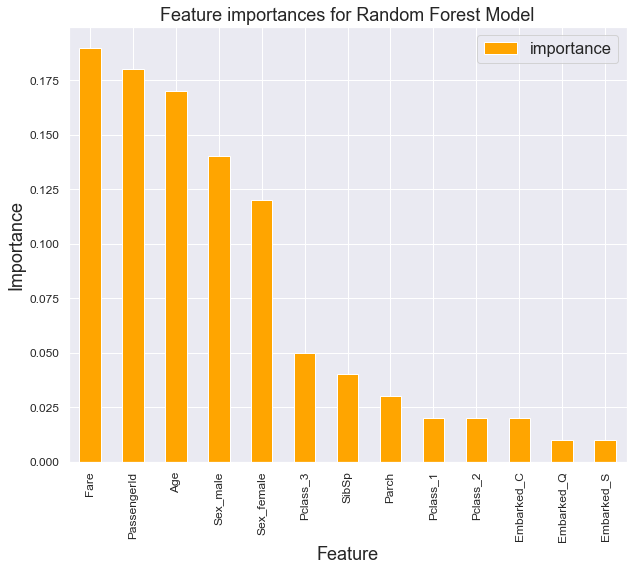

In [26]:
ax = df_feature_importance.plot(kind='bar', 
        x='feature', 
        y='importance',
        figsize=(10,8),
        title= 'Feature importances for Random Forest Model',
        grid=True,
        legend=True,
        fontsize = 12,                        
        color='orange',    
       );
# Set the x-axis label
ax.set_xlabel("Feature")

# Set the y-axis label
ax.set_ylabel("Importance");

In [27]:
# predict the test set
y_pred = clf.predict(X_test)

In [28]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

Text(0.5, 1.0, 'Actual vs. Predicted Confusion Matrix')

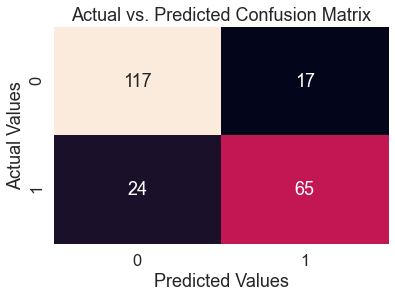

In [29]:
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')

In [30]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       134
           1       0.79      0.73      0.76        89

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.81       223
weighted avg       0.81      0.82      0.81       223



In [31]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       134
           1       0.79      0.73      0.76        89

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.81       223
weighted avg       0.81      0.82      0.81       223



In [32]:
metrics.precision_score(y_test, y_pred)

0.7926829268292683

In [33]:
metrics.recall_score(y_test, y_pred)

0.7303370786516854

In [34]:
acc_RF=metrics.accuracy_score(y_test, y_pred)

In [35]:
acc_RF

0.8161434977578476

In [ ]:
#{'model': [],  'score':[], 'precision':[]}

In [36]:
# comparing actual response values (y_test) with predicted response values (y_pred)
print("model accuracy:", metrics.accuracy_score(y_test, y_pred)* 100)

model accuracy: 81.61434977578476


In [44]:
clf.predict_proba(X_test)

array([[0.63, 0.37],
       [0.95, 0.05],
       [0.87, 0.13],
       [0.04, 0.96],
       [0.71, 0.29],
       [0.04, 0.96],
       [0.14, 0.86],
       [0.87, 0.13],
       [0.24, 0.76],
       [0.1 , 0.9 ],
       [0.78, 0.22],
       [0.96, 0.04],
       [0.85, 0.15],
       [0.97, 0.03],
       [0.88, 0.12],
       [0.04, 0.96],
       [0.69, 0.31],
       [0.27, 0.73],
       [0.97, 0.03],
       [0.94, 0.06],
       [0.93, 0.07],
       [0.28, 0.72],
       [0.71, 0.29],
       [0.99, 0.01],
       [0.98, 0.02],
       [0.9 , 0.1 ],
       [0.9 , 0.1 ],
       [0.95, 0.05],
       [0.7 , 0.3 ],
       [0.43, 0.57],
       [0.98, 0.02],
       [0.46, 0.54],
       [0.48, 0.52],
       [0.45, 0.55],
       [0.6 , 0.4 ],
       [0.56, 0.44],
       [0.89, 0.11],
       [0.41, 0.59],
       [0.09, 0.91],
       [0.98, 0.02],
       [0.87, 0.13],
       [0.81, 0.19],
       [0.86, 0.14],
       [0.88, 0.12],
       [0.58, 0.42],
       [0.93, 0.07],
       [0.72, 0.28],
       [1.  ,

In [37]:
# ROC Curve Metrics

# We grab the second array from the output which corresponds to
# to the predicted probabilites of positive classes 
# Ordered wrt fit.classes_ in our case [0, 1] where 1 is our positive class

predictions_prob = clf.predict_proba(X_test)[:, 1]

predictions_prob

array([0.37, 0.05, 0.13, 0.96, 0.29, 0.96, 0.86, 0.13, 0.76, 0.9 , 0.22,
       0.04, 0.15, 0.03, 0.12, 0.96, 0.31, 0.73, 0.03, 0.06, 0.07, 0.72,
       0.29, 0.01, 0.02, 0.1 , 0.1 , 0.05, 0.3 , 0.57, 0.02, 0.54, 0.52,
       0.55, 0.4 , 0.44, 0.11, 0.59, 0.91, 0.02, 0.13, 0.19, 0.14, 0.12,
       0.42, 0.07, 0.28, 0.  , 0.31, 0.69, 0.9 , 0.98, 0.08, 0.61, 0.05,
       0.94, 0.3 , 0.95, 0.97, 0.75, 0.27, 0.99, 0.98, 0.13, 0.  , 0.96,
       0.15, 0.27, 0.39, 0.98, 0.95, 0.9 , 0.74, 0.99, 0.02, 0.06, 0.89,
       0.98, 1.  , 0.58, 0.09, 0.93, 0.99, 0.05, 0.17, 0.27, 0.97, 1.  ,
       0.03, 0.1 , 0.37, 0.22, 0.22, 0.02, 0.11, 0.15, 0.37, 0.16, 1.  ,
       0.16, 0.15, 0.06, 0.98, 0.05, 0.13, 0.43, 0.96, 0.18, 0.09, 0.16,
       0.97, 0.09, 0.99, 0.61, 0.26, 0.05, 0.15, 0.31, 1.  , 0.14, 0.24,
       0.96, 0.96, 0.67, 0.02, 0.42, 0.95, 0.25, 0.35, 0.05, 0.96, 0.18,
       0.  , 0.76, 0.78, 0.41, 1.  , 0.27, 0.02, 0.24, 0.01, 0.95, 0.03,
       0.26, 0.26, 0.99, 0.05, 0.54, 0.92, 0.04, 0.

In [45]:
fpr2, tpr2, thresholds  = metrics.roc_curve(y_test,
                                  predictions_prob,
                                  pos_label = 0)
auc_rf = metrics.auc(fpr2, tpr2)
auc_rf

0.11944491028006038

In [42]:
fpr2, tpr2, thresholds  = metrics.roc_curve(y_test,
                                  predictions_prob,
                                  pos_label = 1)

In [43]:
auc_rf = metrics.auc(fpr2, tpr2)
auc_rf

0.8805550897199397

In [37]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       134
           1       0.79      0.73      0.76        89

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.81       223
weighted avg       0.81      0.82      0.81       223



In [38]:
# n_estimators 
# represents the number of trees in the forest. 
# Usually the higher the number of trees the better to learn the data. 
# However, adding a lot of trees can slow down the training process considerably, therefore 
# we do a parameter search to find the sweet spot.

In [39]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]

train_results = []
test_results = []

for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(X_train, y_train)
   
   # predict for all the training samples in X_train
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   
   # predict for all the training samples in X_test
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

In [40]:
train_results

[0.9127148911852946,
 0.895161674365446,
 0.9418210390970998,
 0.9723320158102766,
 0.9920948616600791,
 1.0,
 1.0,
 1.0,
 1.0]

In [37]:
test_results

[0.7569595841019621,
 0.762326010397451,
 0.784839845715244,
 0.8054670467885293,
 0.7960758007714238,
 0.81288780815026,
 0.8091983900721114,
 0.7942310917323494,
 0.8017357035049472]

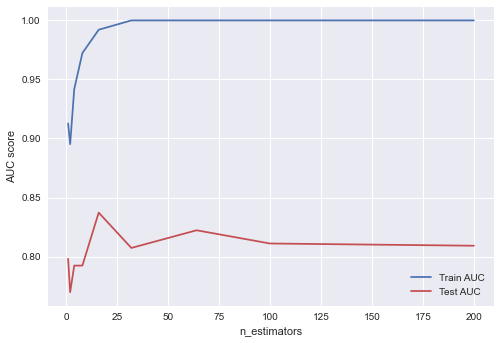

In [41]:
# select the style of the plot
style.use('seaborn')

plt.plot(n_estimators, train_results, 'b', label= 'Train AUC')
plt.plot(n_estimators, test_results,  'r', label= 'Test AUC')

plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.legend();

#### using metrics.log_loss

__ Introduction__
Log Loss is the most important classification metric based on probabilities.

It's __hard to interpret__ raw log-loss values, but log-loss is a good metric for comparing models. For any given problem, _a lower log-loss value means better predictions._

Log Loss is a slight twist on something called the __Likelihood__ Function. 

In fact, 

- Log Loss = -1 * the log of the likelihood

> often used as an evaluation metric in Kaggle competitions. 

__Example__

Task : house selling probailities

- labels = ['sold', 'unsold']
- 3 houses
- A model predicts probabilities of [0.8, 0.4, 0.1] for 3 houses. 
- y_test = ['sold', 'sold, 'unsold'] - The first 2 houses were sold and the last one was not sold. 

- So the actual outcomes could be represented numeically as [1, 1, 0].

1. The first house sold, and the model said that was 80% likely. So, the likelihood function after looking at one prediction is 0.8.

2. The second house sold, and the model said that was 40% likely. There is a rule of probability that the probability of multiple independent events is the product of their individual probabilities. So, we get the combined likelihood from the first two predictions by multiplying their associated probabilities. That is 0.8 * 0.4, which happens to be 0.32.

3. Now we get to our third prediction. That home did not sell. The model said it was 10% likely to sell. That means it was 90% likely to not sell. So, the observed outcome of not selling was 90% likely according to the model. So, we multiply the previous result of 0.32 by 0.9.

We could step through all of our predictions. Each time we'd find the probability associated with the outcome that actually occurred, and we'd multiply that by the previous result. __That's the likelihood.__

#### From Likelihood to Log Loss
- Each prediction is between 0 and 1. 
- If we multiply enough numbers in this range, the result gets so small that computers can't keep track of it. 
- So, a computational trick, instead keep track of the log of the Likelihood. We multiply this by negative 1 to maintain a common convention that lower loss scores are better.

#### Another example ... on log_loss

In [42]:
# 3 samples
actual_labels = ["bam", "ham", "spam"]

> - To work out the log loss score we need to make a prediction for what we think each label actually is. We do this by passing an array containing a probability between 0-1 for each label

> - e.g. if we think the first label is definitely 'bam' then we'd pass [1, 0, 0], whereas if we thought it had a 50-50 chance of being 'bam' or 'spam' then we might pass [0.5, 0, 0.5].  
> - __alphabetical order__ so we need to provide our predictions in the same order.

In [43]:
# perfect prediction
log_loss(actual_labels,  [[1, 0, 0], [0, 1, 0], [0, 0, 1]])

NameError: name 'log_loss' is not defined

In [44]:
math.exp(2.1094237467877998e-15)

1.0000000000000022

In [45]:
# absolutely wrong prediction
log_loss(actual_labels,  [[0, 0, 1], [1, 0, 0], [0, 1, 0]])

NameError: name 'log_loss' is not defined

In [46]:
math.exp(34.538776394910684)

999999999999998.9

#### Example 2 (log_loss)

In [47]:
# # label = ['ham', 'spam']
y_pred = [[ 0.1 ,  0.9 ],
          [ 0.9 ,  0.1 ],
          [ 0.8 ,  0.2 ],
          [ 0.35,  0.65]]

In [48]:
y_test = ["spam", "ham", "ham", "spam"]

In [49]:
log_loss(y_test, y_pred)


NameError: name 'log_loss' is not defined

In [50]:
# Explaining...
# 0 - ham, 1 - spam
transformed_labels = np.array([[1],
                               [0],
                               [0],
                               [1]])

In [51]:
np.log(y_pred)

array([[-2.30258509, -0.10536052],
       [-0.10536052, -2.30258509],
       [-0.22314355, -1.60943791],
       [-1.04982212, -0.43078292]])

In [52]:
transformed_labels* np.log(y_pred)

array([[-2.30258509, -0.10536052],
       [-0.        , -0.        ],
       [-0.        , -0.        ],
       [-1.04982212, -0.43078292]])

In [53]:
-(transformed_labels * np.log(y_pred)).sum(axis=1)

array([ 2.40794561, -0.        , -0.        ,  1.48060504])

#### example 3 (log loss)

In [54]:
actual_labels = ["bam", "ham", "spam"]

In [55]:
# 0.363548039673 = -1/3 * (log(0.8) + log(0.6) + log(0.7)
log_loss(actual_labels, [[0.8, 0.1, 0.1], [0.3, 0.6, 0.1], [0.15, 0.15, 0.7]])

NameError: name 'log_loss' is not defined

In [56]:
# In this case, on average our probability estimate would be:
# we put in the negative value since we multiplied by -1/N

# overall probability of 69.5% seems about right.
math.exp(-0.363548039673)

0.6952053289772744

In [57]:
log_loss(["bam", "ham", "spam", "spam"], 
         [[0.8, 0.1, 0.1], 
          [0.3, 0.6, 0.1], 
          [0.15, 0.15, 0.7], 
          [0.05, 0.05, 0.9]])

NameError: name 'log_loss' is not defined

In [58]:
math.exp(-0.299001158669)

# 74% accuracy overall, sounds about right!

0.741558550213609

#### back to the titanic code

In [59]:
errors = []
growing_rf = RandomForestClassifier(n_estimators=10, 
                                    n_jobs=-1,  
                                    warm_start=True, 
                                    random_state=1514)
for i in range(30):
    growing_rf.fit(X_train, y_train)
    
    growing_rf.n_estimators += 10
    
    errors.append(metrics.log_loss(y_test, growing_rf.predict_proba(X_test)))

_ = plt.plot(errors, '-r')

ValueError: Found input variables with inconsistent numbers of samples: [223, 4]

In [60]:
errors

[]

In [61]:
# max_depth
# max_depth represents the depth of each tree in the forest. The deeper the tree, 
# the more splits it has and it captures more information about the data. We fit each decision 
# tree with depths ranging from 1 to 32 and plot the training and test errors.

max_depths = np.linspace(1, 32, 32, endpoint=True)

train_results = []
test_results = []

for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
   rf.fit(X_train, y_train)
   
   # predict for all the training samples in X_train
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   
   # predict for all the training samples in X_test
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

ValueError: Found input variables with inconsistent numbers of samples: [4, 223]

ValueError: x and y must have same first dimension, but have shapes (32,) and (1,)

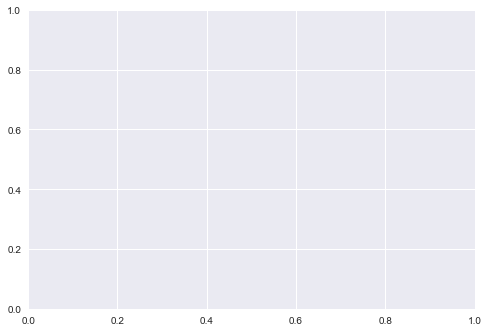

In [62]:
# model overfits for large depth values. 
# The trees perfectly predicts all of the train data, 
# however, it fails to generalize the findings for new data

# select the style of the plot
style.use('seaborn')

plt.plot(max_depths, train_results, 'b', label= 'Train AUC')
plt.plot(max_depths, test_results,  'r', label= 'Test AUC')

plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend();

In [63]:
# min_samples_split
# represents the minimum number of samples required to split an internal node. 

# This can vary between considering at least one sample at each node to 
# considering all of the samples at each node. When we increase this parameter, each tree 
# in the forest becomes more constrained as it has to consider more samples at each node. 
# Here we will vary the parameter from 10% to 100% of the samples

In [65]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)

train_results = []
test_results = []

for min_samples_split in min_samples_splits:
   rf = RandomForestClassifier(min_samples_split=min_samples_split, n_jobs=-1)
   rf.fit(X_train, y_train)
   
   # predict for all the training samples in X_train
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   
   # predict for all the training samples in X_test
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

ValueError: Found input variables with inconsistent numbers of samples: [4, 223]

ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

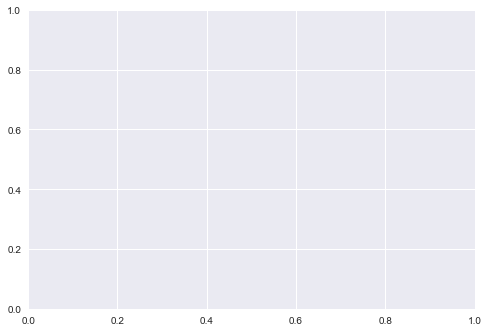

In [66]:
# select the style of the plot
style.use('seaborn')

plt.plot(min_samples_splits, train_results, 'b', label= 'Train AUC')
plt.plot(min_samples_splits, test_results,  'r', label= 'Test AUC')

plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend();

In [48]:
# We can clearly see that when we require all of the samples at each node, the model cannot 
# learn enough about the data. 
# This is an underfitting case.

In [49]:
list(range(1,X_train.shape[1]))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [46]:
# max_features
# represents the number of features to consider when looking for the best split.

max_features = list(range(1,X_train.shape[1]))

train_results = []
test_results = []

for max_feature in max_features:
   rf = RandomForestClassifier(max_features=max_feature, n_jobs=-1)
   rf.fit(X_train, y_train)
   
   # predict for all the training samples in X_train
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   
   # predict for all the training samples in X_test
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

C:\Users\home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\home\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: Future

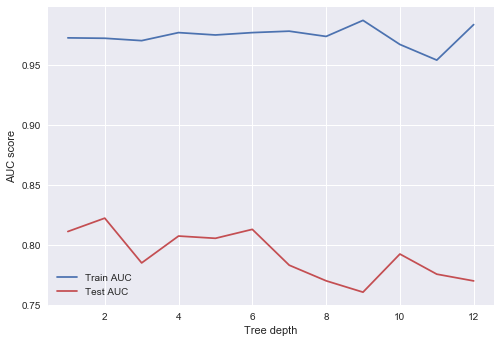

In [48]:
# select the style of the plot
style.use('seaborn')

plt.plot(max_features, train_results, 'b', label= 'Train AUC')
plt.plot(max_features, test_results,  'r', label= 'Test AUC')

plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend();